In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#import Restaurant Reviews Dataset 
df=pd.read_table("C:\\Users\\ramya\\OneDrive\\Desktop\\Restaurant_Reviews.tsv")

In [11]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
df.describe()


,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [14]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [15]:
df['Liked'].nunique()

2

In [16]:
print(df['Liked'].unique())

[1 0]


In [17]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

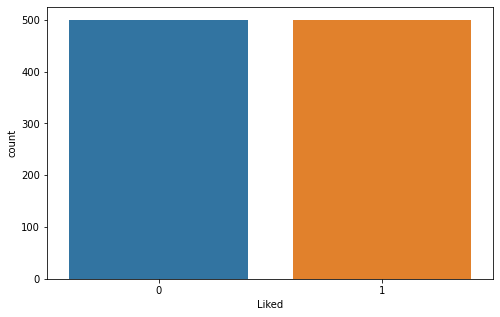

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

<AxesSubplot:>

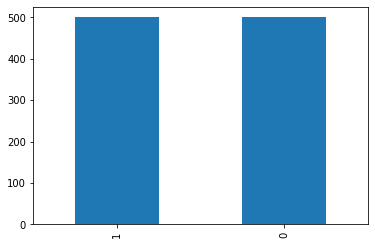

In [19]:
df['Liked'].value_counts().plot(kind ='bar')

In [20]:
x=df['Review'].values
y=df['Liked'].values

In [21]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [22]:
x_train.shape

(750,)

In [23]:
x_test.shape

(250,)

In [24]:
y_train.shape

(750,)

In [25]:
y_test.shape

(250,)

In [26]:
# Applying the Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [27]:
x_train_vect.toarray() #gives a sparse representation of numbers after converting from text 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
from sklearn.svm import SVC #importing svc
model1=SVC()

In [29]:
model1.fit(x_train_vect,y_train)

SVC()

In [30]:
y_pred1=model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.72

In [32]:
# PIPELINE (combines two estimators = svc+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train) 

y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.792

In [34]:
# APPLY ML MODEL (NAIVE BAYES)
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB() 

In [35]:
model3.fit(x_train_vect,y_train)
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [37]:
# PIPELINE WITH MultinomialNB 
# PIPELINE (combines two estimators = MultinomialNB+countvectorizer)
from sklearn.pipeline import make_pipeline 

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train) 

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [39]:
import joblib 
joblib.dump(model4,'restaurant-reviews')
text_model = joblib.load('restaurant-reviews')   #reloading the created joblib model for predictions 
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [40]:
text_model.predict(['hello!!Love Your Food'])

array([1], dtype=int64)

In [41]:
text_model.predict(["omg!!it was too spice and i asked you don't add too much "])

array([0], dtype=int64)

In [42]:
"""SENTIMENT ANALYSIS  
1.Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source.
2.These data are useful in understanding the opinion of the people about a variety of topics
3.Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. 
It’s also known as opinion mining, deriving the opinion or attitude of a speaker
4.The most common type of sentiment analysis is ‘polarity detection’ and involves classifying statements as Positive, Negative or Neutral.
5.Sentiment analysis uses Natural Language Processing (NLP) to make sense of human language, and machine learning to automatically deliver accurate results.
6.Emotion detection sentiment analysis allows you to go beyond polarity to detect emotions, like happiness, frustration, anger, and sadness."""

'SENTIMENT ANALYSIS  \n1.Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source.\n2.These data are useful in understanding the opinion of the people about a variety of topics\n3.Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. \nIt’s also known as opinion mining, deriving the opinion or attitude of a speaker\n4.The most common type of sentiment analysis is ‘polarity detection’ and involves classifying statements as Positive, Negative or Neutral.\n5.Sentiment analysis uses Natural Language Processing (NLP) to make sense of human language, and machine learning to automatically deliver accurate results.\n6.Emotion detection sentiment analysis allows you to go beyond polarity to detect emotions, like happiness, frustration, anger, and sadness.'

In [43]:
""" TWITTER SENTIMENTS  
1.Tweets are often useful in generating a vast amount of sentiment data upon analysis.
2.Twitter sentiment analysis allows you to keep track of what's being said about your product or service on social media, 
and can help you detect angry customers or negative mentions before they they escalate.
3.Twitter allows businesses to engage personally with consumers. However, there’s so much data on Twitter that it can be hard 
for brands to prioritize which tweets or mentions to respond to first.
4.Performing sentiment analysis on Twitter data involves five steps:
*Gather relevant Twitter data
*Clean your data using pre-processing techniques
*Create a sentiment analysis machine learning model
*Analyze your Twitter data using your sentiment analysis model
*Visualize the results of your Twitter sentiment analysis"""

" TWITTER SENTIMENTS  \n1.Tweets are often useful in generating a vast amount of sentiment data upon analysis.\n2.Twitter sentiment analysis allows you to keep track of what's being said about your product or service on social media, \nand can help you detect angry customers or negative mentions before they they escalate.\n3.Twitter allows businesses to engage personally with consumers. However, there’s so much data on Twitter that it can be hard \nfor brands to prioritize which tweets or mentions to respond to first.\n4.Performing sentiment analysis on Twitter data involves five steps:\n*Gather relevant Twitter data\n*Clean your data using pre-processing techniques\n*Create a sentiment analysis machine learning model\n*Analyze your Twitter data using your sentiment analysis model\n*Visualize the results of your Twitter sentiment analysis"